In [162]:
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Data Augmentation for SSD
1. Image Distortions
    - Random Brightness
    - Random Constrast
    - Random Hue
    - Random Saturation
    - Random Reorder Channels

In [6]:
#### Helper Functions
def show_img(im, figsize=None, ax=None):
    if not ax: fig, ax = plt.subplots(figsize=figsize)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

### Random Brightness

In [12]:
filename = 'images/demo.jpg'
image = cv2.imread(filename)
image.shape, image.dtype

((160, 160, 3), dtype('uint8'))

In [13]:
def brightness(image, delta):
    data = image.astype(np.float32)
    delta = random.randint(-delta, delta)
    data += delta
    data[data > 255] = 255
    data[data < 0] = 0
    data = data.astype(np.uint8)
    return data

def random_brightness(image, delta=0, prob=1):
    p = random.uniform(0, 1)
    if p < prob:
        return brightness(image, delta)
    return image

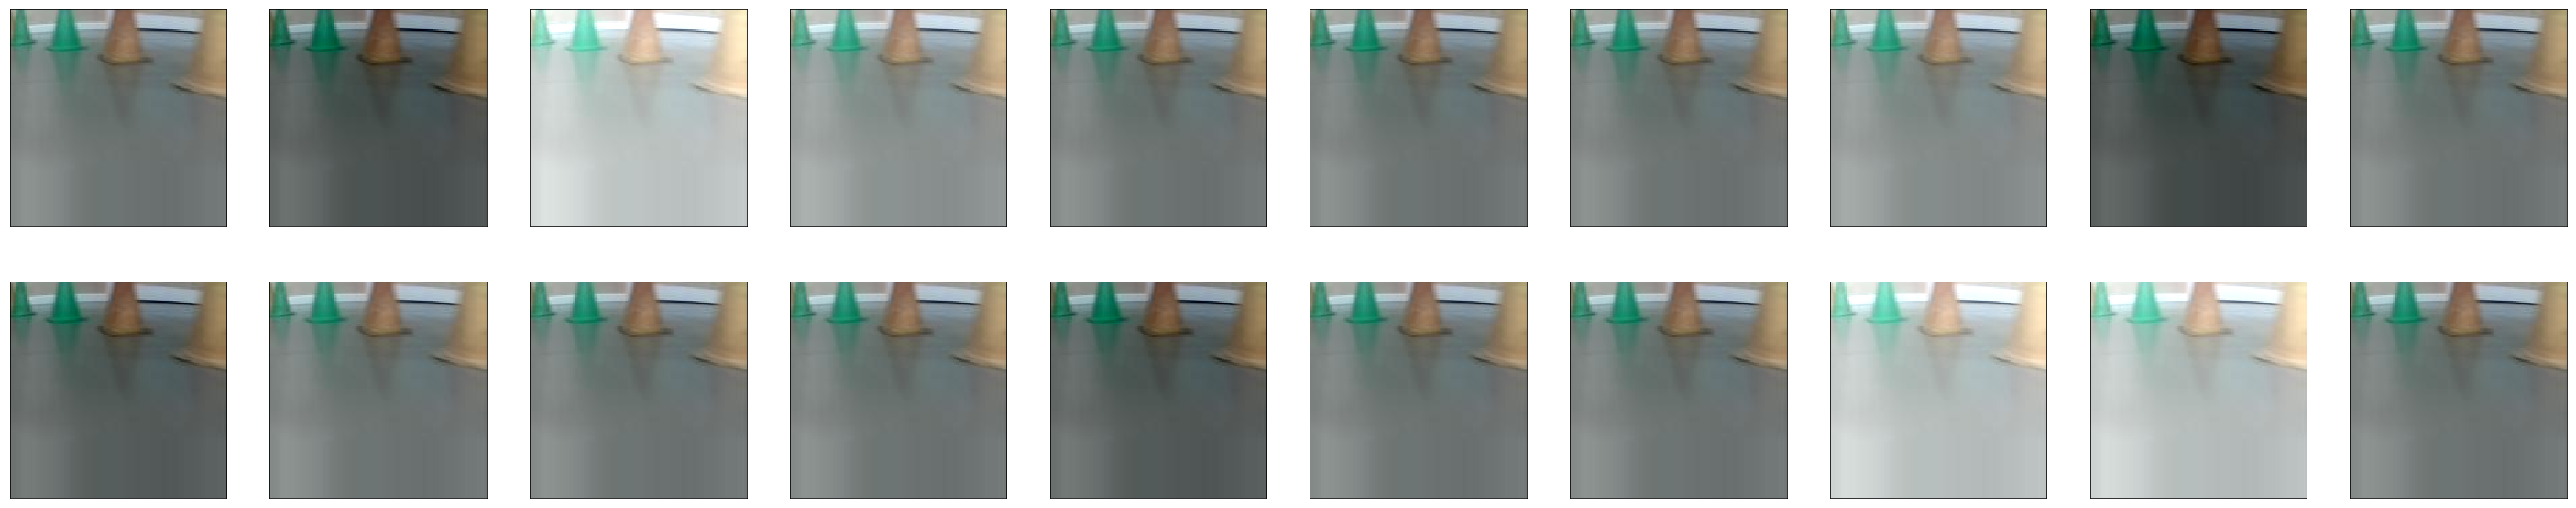

In [75]:
fig, axes = plt.subplots(2, 10, figsize=(50, 10))
for i, ax in enumerate(axes.flat):
    tf_image = random_brightness(image, delta=100, prob=0.5)
    show_img(tf_image, ax=ax)
plt.show()

### Random Constrast
- [read more about constrast](https://en.wikipedia.org/wiki/Contrast_(vision))

In [22]:
def constrast(image, lower, upper):
    data = image.astype(np.float32)
    delta = random.uniform(lower, upper)
    data *= delta
    data[data > 255] = 255
    data[data < 0] = 0
    data = data.astype(np.uint8)
    return data

def random_constrast(image, lower=0, upper=0, prob=1):
    p = random.uniform(0, 1)
    if p < prob:
        return constrast(image, lower, upper)
    return image

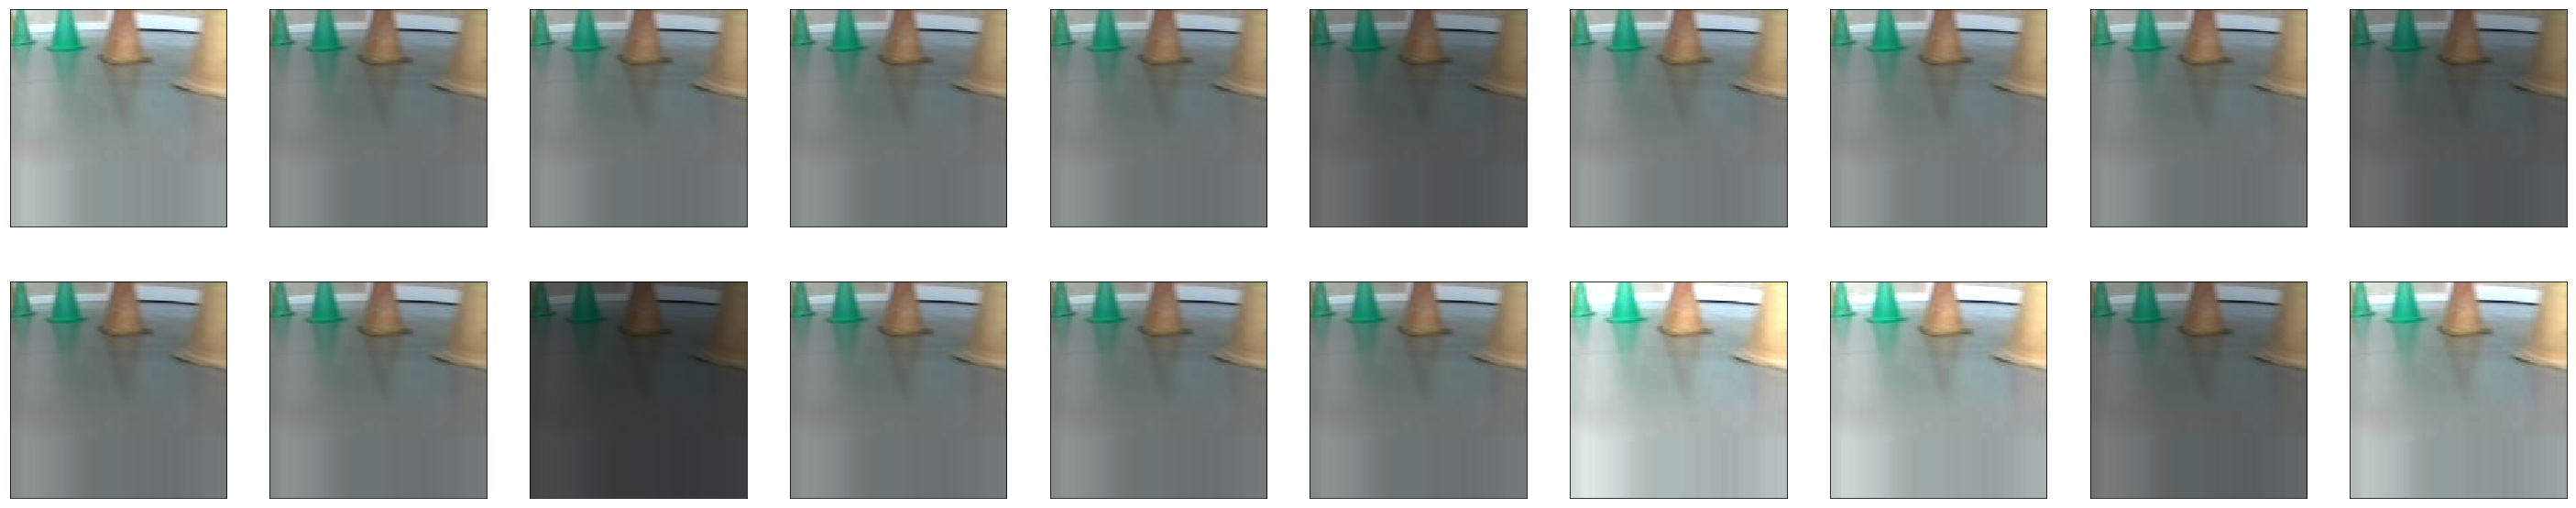

In [95]:
fig, axes = plt.subplots(2, 10, figsize=(50, 10))
for i, ax in enumerate(axes.flat):
    tf_image = random_constrast(image, lower=0.5, upper=1.8, prob=0.5)
    show_img(tf_image, ax=ax)
plt.show()

### Random Hue
- [Read about hue](https://en.wikipedia.org/wiki/Hue)

In [149]:
def hue(image, delta):
    data = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    data = data.astype(np.float32)
    delta = random.randint(-delta, delta)
    data[0] += delta
    data[0][data[0]>180] -= 180
    data[0][data[0]<0] +=180
    data = data.astype(np.uint8)
    data = cv2.cvtColor(data, cv2.COLOR_HSV2BGR)
    return data

def random_hue(image, delta=None, prob=1):
    p = random.uniform(0, 1)
    if p < prob:
        return hue(image, delta)
    return image

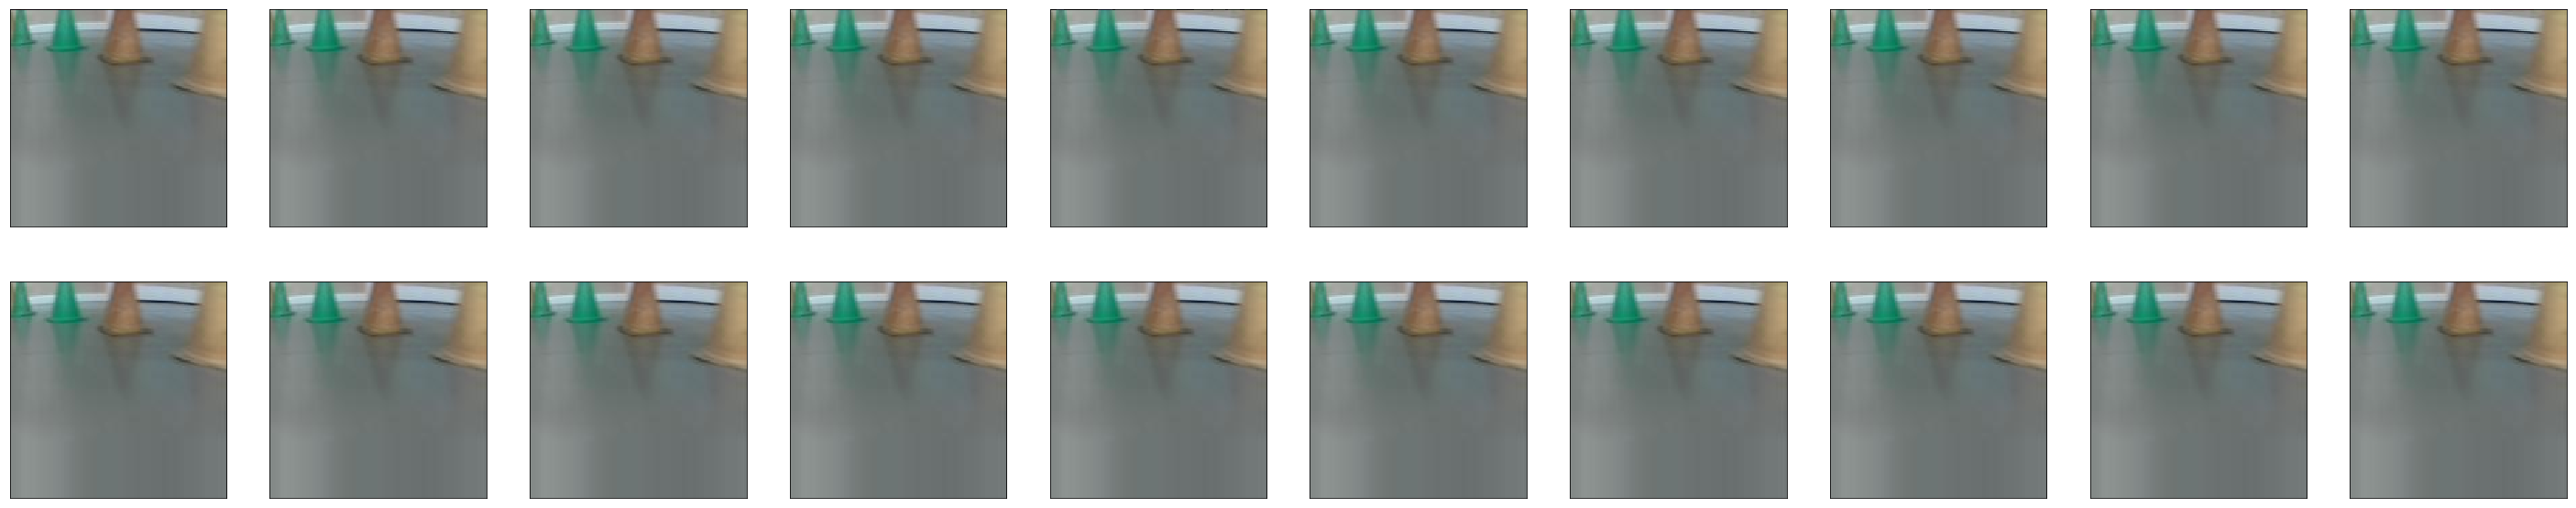

In [150]:
fig, axes = plt.subplots(2, 10, figsize=(50, 10))
for i, ax in enumerate(axes.flat):
    tf_image = random_hue(image, delta=100, prob=0.5)
    show_img(tf_image, ax=ax)
plt.show()

### Random Saturation
- [Read about saturation](https://en.wikipedia.org/wiki/Colorfulness)

In [160]:
def saturation(image, lower, upper):
    data = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    data = data.astype(np.float32)
    delta = random.uniform(lower, upper)
    data[1] *= delta
    data[1][data[1]>180] -= 180
    data[1][data[1]<0] +=180
    data = data.astype(np.uint8)
    data = cv2.cvtColor(data, cv2.COLOR_HSV2BGR)
    return data 

def random_saturation(image, lower=0, upper=0, prob=1):
    p = random.uniform(0, 1)
    if p < prob:
        return saturation(image, lower, upper)
    return image

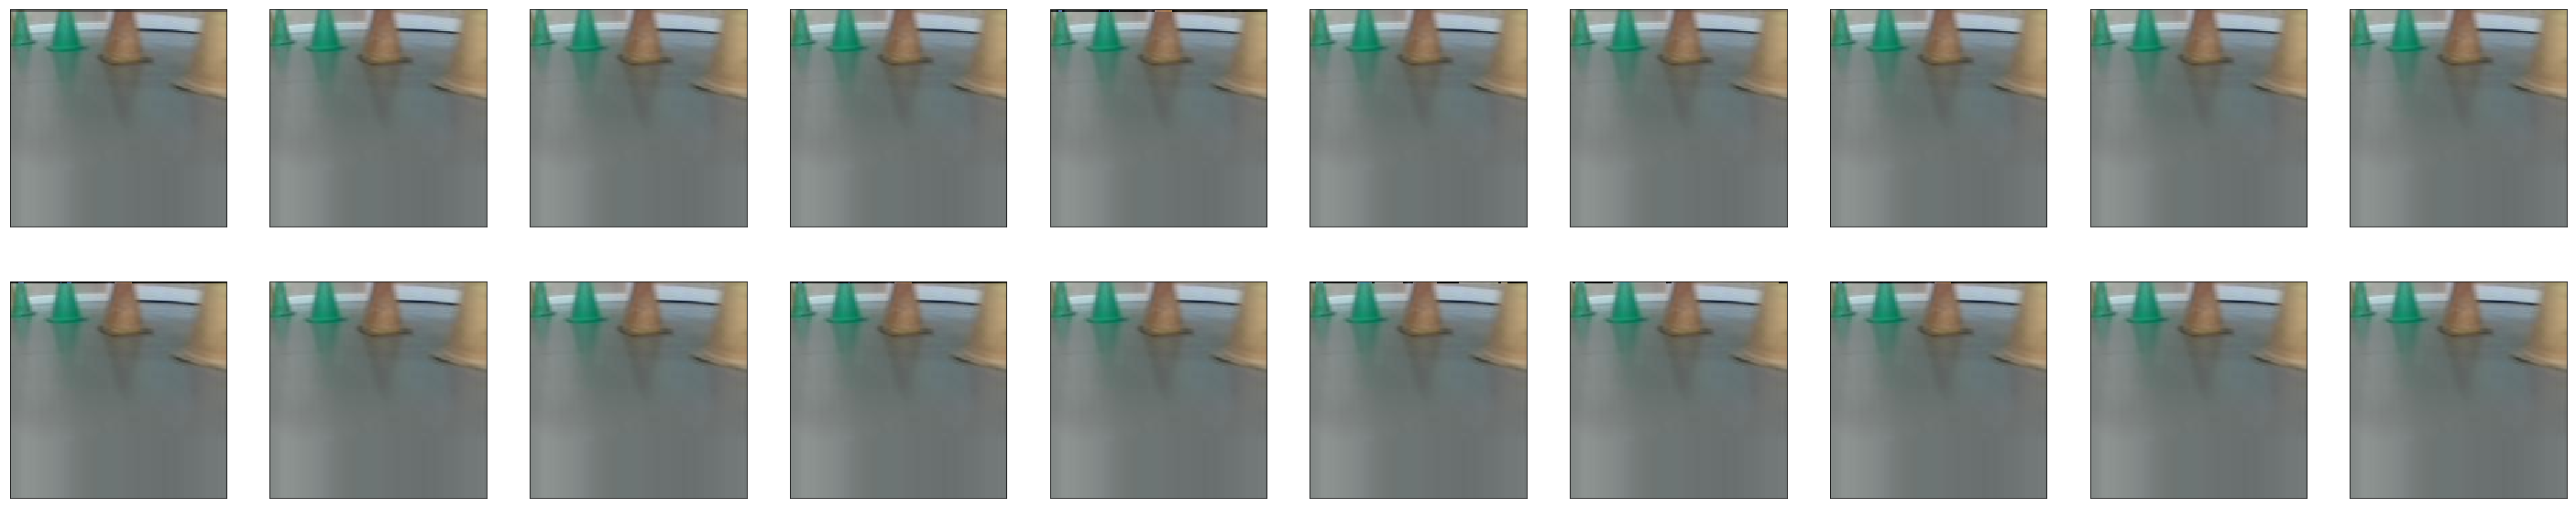

In [161]:
fig, axes = plt.subplots(2, 10, figsize=(50, 10))
for i, ax in enumerate(axes.flat):
    tf_image = random_saturation(image, lower=0.5, upper=1.5, prob=0.5)
    show_img(tf_image, ax=ax)
plt.show()